# Validation regularization and callbacks

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
print(np.__version__)
print(tf.__version__)

1.18.1
2.3.1


## Validation sets
### Load the data

In [3]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
# Save the input and target variables
print(diabetes_datasets.keys())

data = diabetes_datasets['data']
target = diabetes_datasets['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
# Normalize the target data
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compo;e the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [11]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.8148 - mae: 0.6804


[0.8147581219673157, 0.6804368495941162]

### Plot the learning curves

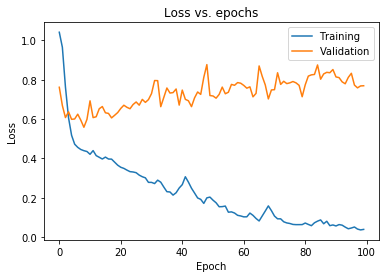

In [12]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Model regularization
### Adding regularization with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],), 
                                                   kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Rebuild the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the model
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)

2/2 [==============================] - 0s 2ms/step - loss: 0.6004 - mae: 0.5720


[0.6004400253295898, 0.5720266699790955]

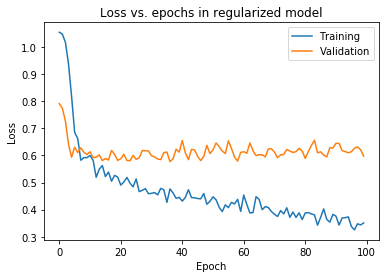

In [19]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs in regularized model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Batch Normalization

In this reading we will look at incorporating batch normalisation into our models and look at an example of how we do this in practice.

In [20]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

### Defining the model
We can implement batch normalisation into our model by adding it in the same way as any other layer.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [22]:
model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
________________________________________________

Recall that there are some parameters and hyperparameters associated with batch normalisation.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

### Customising parameters
These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

We can also specify the axis for batch normalisation. By default, it is set as -1.

In [24]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [25]:
model.add(Dense(1))

### Compile and fit the model

Let's now compile and fit our model with batch normalisation, and track the progress on training and validation sets.

In [26]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

Now we fit the model to the data.

In [27]:
history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, 
                    batch_size=64,verbose=False)

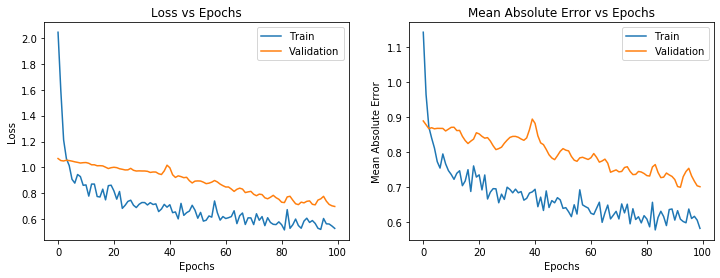

In [28]:
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

### Further reading and resources
* https://keras.io/layers/normalization/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization

## Introduction to callbacks
### Example training callback

In [29]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")

In [30]:
model = get_regularized_model(1e-5, 0.3)
model.compile(optimizer='adam', loss='mse')

### Train the model with the callback

In [31]:
history = model.fit(train_data, train_target, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [32]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
            
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [33]:
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


1.0168426036834717

In [34]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
            
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [35]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[-0.03678953],
       [-0.04508097],
       [ 0.11912316],
       [-0.04100739],
       [ 0.01151988],
       [-0.03794045],
       [ 0.02991905],
       [-0.00859033],
       [ 0.13969013],
       [ 0.08571748],
       [ 0.1289602 ],
       [-0.04184144],
       [ 0.11768811],
       [ 0.09461924],
       [ 0.18311448],
       [-0.00056085],
       [-0.03805072],
       [-0.03287851],
       [ 0.06846951],
       [-0.04610692],
       [-0.04407612],
       [ 0.05031965],
       [-0.00507933],
       [-0.01301473],
       [ 0.00656419],
       [ 0.0745092 ],
       [ 0.05201751],
       [ 0.11974687],
       [ 0.08582114],
       [-0.03543566],
       [ 0.10432925],
       [ 0.13196042],
       [ 0.1769705 ],
       [ 0.08961377],
       [-0.02931934],
       [ 0.05382781],
       [-0.0385493 ],
       [-0.04123415],
       [ 0.13835777],
       [ 0.07466248],
       [ 0.08591396],
       [ 0.00898168],
       [ 0.00580464],
       [ 0.0593774 ],
       [-0.04415627]], dtype=flo

## Using the logs dictionary

In this reading, we will learn how to take advantage of the `logs` dictionary in Keras to define our own callbacks and check the progress of a model.

The `logs` dictionary stores the loss value, along with all of the metrics we are using at the end of a batch or epoch.

We can incorporate information from the `logs` dictionary into our own custom callbacks.

Let's see this in action in the context of a model we will construct and fit to the `sklearn` diabetes dataset that we have been using in this module.

In [36]:
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

We now compile the model, with
* Mean squared error as the loss function,
* the Adam optimizer, and 
* Mean absolute error (`mae`) as a metric.

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 18,305
Trainable params: 18,177
Non-trainable params: 128
________________________________________________

### Defining a custom callback

Now we define our custom callback using the `logs` dictionary to access the loss and metric values.

In [39]:
class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'
              .format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self, batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

We now fit the model to the data, and specify that we would like to use our custom callback `LossAndMetricCallback()`.

In [40]:
history = model.fit(train_data, train_target, epochs=20,
                    batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is    1.00.

 After batch 2, the loss is    0.94.
Epoch 0: Average loss is    0.91, mean absolute error is    0.81.

 After batch 0, the loss is    0.70.

 After batch 2, the loss is    0.65.
Epoch 1: Average loss is    0.62, mean absolute error is    0.66.

 After batch 0, the loss is    0.53.

 After batch 2, the loss is    0.53.
Epoch 2: Average loss is    0.53, mean absolute error is    0.59.

 After batch 0, the loss is    0.55.

 After batch 2, the loss is    0.47.
Epoch 3: Average loss is    0.48, mean absolute error is    0.55.

 After batch 0, the loss is    0.45.

 After batch 2, the loss is    0.44.
Epoch 4: Average loss is    0.46, mean absolute error is    0.54.

 After batch 0, the loss is    0.49.

 After batch 2, the loss is    0.47.
Epoch 5: Average loss is    0.45, mean absolute error is    0.53.

 After batch 0, the loss is    0.34.

 After batch 2, the loss is    0.45.
Epoch 6: Average loss is    0.42, mean absolute error is    0.51.

 Afte

We can also use our callback in the `evaluate` function...

In [41]:
model_eval = model.evaluate(test_data, test_target, batch_size=10, 
                            callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is    0.90.

 After batch 1, the loss is    0.93.

 After batch 2, the loss is    0.89.

 After batch 3, the loss is    0.98.

 After batch 4, the loss is    1.03.


...And also the `predict` function.

In [42]:
model_pred = model.predict(test_data, batch_size=10,
                           callbacks=[LossAndMetricCallback()], verbose=False)

Finished prediction on batch 0!
Finished prediction on batch 1!
Finished prediction on batch 2!
Finished prediction on batch 3!
Finished prediction on batch 4!


### Application - learning rate scheduler
Let's now look at a more sophisticated custom callback. 

We are going to define a callback to change the learning rate of the optimiser of a model during training. We will do this by specifying the epochs and new learning rates where we would like it to be changed.

First we define the auxillary function that returns the learning rate for each epoch based on our schedule.

In [43]:
lr_schedule = [
    (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched) > 0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

Let's now define the callback itself.

In [44]:
class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # Add the new learning rate function to our callback
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # Get the current learning rate
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        # Call the auxillary function to get the scheduled learning rate for the current epoch
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # Set the learning rate to the scheduled learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [45]:
new_model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [46]:
new_model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae', 'mse'])

In [47]:
new_history = new_model.fit(train_data, train_target, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

Learning rate for epoch 0 is   0.001
Learning rate for epoch 1 is   0.001
Learning rate for epoch 2 is   0.001
Learning rate for epoch 3 is   0.001
Learning rate for epoch 4 is   0.030
Learning rate for epoch 5 is   0.030
Learning rate for epoch 6 is   0.030
Learning rate for epoch 7 is   0.020
Learning rate for epoch 8 is   0.020
Learning rate for epoch 9 is   0.020
Learning rate for epoch 10 is   0.020
Learning rate for epoch 11 is   0.005
Learning rate for epoch 12 is   0.005
Learning rate for epoch 13 is   0.005
Learning rate for epoch 14 is   0.005
Learning rate for epoch 15 is   0.007
Learning rate for epoch 16 is   0.007
Learning rate for epoch 17 is   0.007
Learning rate for epoch 18 is   0.007
Learning rate for epoch 19 is   0.007


### Further reading and resources
* https://www.tensorflow.org/guide/keras/custom_callback
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

## Early Stopping and patience

### Re-train the model with early stopping

In [58]:
# Re-train unregularized model
unregularized_model = get_model()
unregularized_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularized_model.fit(train_data, train_target, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [59]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.4298


0.42983707785606384

In [60]:
# Re-train regularized model
regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer='adam', loss='mse')
reg_history = regularized_model.fit(train_data, train_target, epochs=100,
                                    validation_split=0.15, batch_size=64, verbose=False,
                                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [61]:
regularized_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.5122


0.5121858716011047

### Plot the learning curves

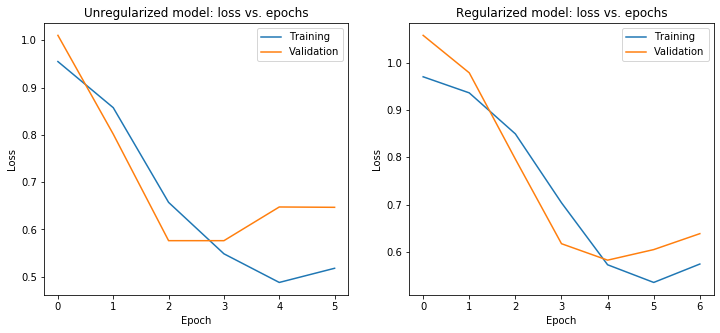

In [62]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title("Unregularized model: loss vs. epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training', 'Validation'], loc='best')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title("Regularized model: loss vs. epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training', 'Validation'], loc='best')

plt.show()

## Additional Callbacks
In this reading we'll be looking at more of the inbuilt callbacks available in Keras.

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

### Learning rate scheduler
**Usage:** `tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`

The learning rate scheduler that we implemented in the previous reading as a custom callback is also available as a built in callback. 

As in our custom callback, the `LearningRateScheduler` in Keras takes a function `schedule` as an argument. 

This function `schedule` should take two arguments:
* The current epoch (as an integer), and
* The current learning rate,

and return new learning rate for that epoch. 

The `LearningRateScheduler` also has an optional `verbose` argument, which prints information about the learning rate if it is set to 1.

Let's see a simple example.


In [64]:
# Define the learning rate schedule function
def lr_function(epoch, lr):
    if epoch % 2 == 0:
        return lr
    else:
        return lr + epoch/1000

In [66]:
history = model.fit(train_data, train_target, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)], 
                    verbose=False)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020000000474974513.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0020000000949949026.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005000000094994903.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.004999999888241291.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.009999999888241292.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.009999999776482582.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.01699999977648258.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.016999999061226845.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.025999999061226846.


You can also use lambda functions to define your `schedule` given an epoch.

In [68]:
history = model.fit(train_data, train_target, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)], 
                    verbose=False)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.030303030303030304.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.02631578947368421.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.023255813953488372.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.020833333333333332.


### CSV logger
**Usage** `tf.keras.callbacks.CSVLogger(filename, separator=',', append=False)`

This callback streams the results from each epoch into a CSV file.
The first line of the CSV file will be the names of pieces of information recorded on each subsequent line, beginning with the epoch and loss value. The values of metrics at the end of each epoch will also be recorded.

The only compulsory argument is the `filename` for the log to be streamed to. This could also be a filepath.

You can also specify the `separator` to be used between entries on each line.

The `append` argument allows you the option to append your results to an existing file with the same name. This can be particularly useful if you are continuing training.

Let's see an example.

In [70]:
history = model.fit(train_data, train_target, epochs=10,
                    callbacks=[tf.keras.callbacks.CSVLogger("results.csv")], verbose=False)

Let's view the information in the CSV file we have created using `pandas`.

In [72]:
result = pd.read_csv('results.csv', index_col='epoch')
result

,loss,mae,mse
epoch,,,
0,1.002218,0.846232,1.002218
1,0.999366,0.844685,0.999366
2,1.015351,0.862513,1.015351
3,1.001980,0.830949,1.001980
4,1.028079,0.868260,1.028079
5,0.995282,0.833951,0.995282
6,0.994341,0.851425,0.994341
7,1.003615,0.848737,1.003615
8,0.996631,0.843637,0.996631


### Lambda callbacks
**Usage** `tf.keras.callbacks.LambdaCallback(
        on_epoch_begin=None, on_epoch_end=None, 
        on_batch_begin=None, on_batch_end=None, 
        on_train_begin=None, on_train_end=None)`

Lambda callbacks are used to quickly define simple custom callbacks with the use of lambda functions.

Each of the functions require some positional arguments.
* `on_epoch_begin` and `on_epoch_end` expect two arguments: `epoch` and `logs`,
* `on_batch_begin` and `on_batch_end` expect two arguments: `batch` and `logs` and
* `on_train_begin` and `on_train_end` expect one argument: `logs`.

Let's see an example of this in practice.

In [73]:
# Print the epoch number at the beginning of each epoch
epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1)))

# Print the loss at the end of each batch
batch_loss_callback = tf.keras.callbacks.LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'
                                          .format(batch, logs['loss'])))

# Inform that training is finished
train_finish_callback = tf.keras.callbacks.LambdaCallback(
    on_train_end=lambda logs: print('Training finished!'))

In [75]:
history = model.fit(train_data, train_target, epochs=5, batch_size=100,
                    callbacks=[epoch_callback, batch_loss_callback,train_finish_callback], verbose=False)

Starting Epoch 1!

 After batch 0, the loss is    0.92.

 After batch 1, the loss is    0.95.

 After batch 2, the loss is    0.99.

 After batch 3, the loss is    0.99.
Starting Epoch 2!

 After batch 0, the loss is    1.14.

 After batch 1, the loss is    1.02.

 After batch 2, the loss is    1.00.

 After batch 3, the loss is    0.99.
Starting Epoch 3!

 After batch 0, the loss is    0.86.

 After batch 1, the loss is    0.94.

 After batch 2, the loss is    1.02.

 After batch 3, the loss is    0.99.
Starting Epoch 4!

 After batch 0, the loss is    0.91.

 After batch 1, the loss is    0.96.

 After batch 2, the loss is    0.98.

 After batch 3, the loss is    0.99.
Starting Epoch 5!

 After batch 0, the loss is    0.98.

 After batch 1, the loss is    0.98.

 After batch 2, the loss is    0.95.

 After batch 3, the loss is    0.99.
Training finished!


### Reduce learning rate on plateau
**Usage** `tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.1, 
            patience=10, 
            verbose=0, 
            mode='auto', 
            min_delta=0.0001, 
            cooldown=0, 
            min_lr=0)`

The `ReduceLROnPlateau` callback allows reduction of the learning rate when a metric has stopped improving. 
The arguments are similar to those used in the `EarlyStopping` callback.
* The argument `monitor` is used to specify which metric to base the callback on.
* The `factor` is the factor by which the learning rate decreases i.e., new_lr=factor*old_lr.
* The `patience` is the number of epochs where there is no improvement on the monitored metric before the learning rate is reduced.
* The `verbose` argument will produce progress messages when set to 1.
* The `mode` determines whether the learning rate will decrease when the monitored quantity stops increasing (`max`) or decreasing (`min`). The `auto` setting causes the callback to infer the mode from the monitored quantity.
* The `min_delta` is the smallest change in the monitored quantity to be deemed an improvement.
* The `cooldown` is the number of epochs to wait after the learning rate is changed before the callback resumes normal operation.
* The `min_lr` is a lower bound on the learning rate that the callback will produce.

Let's examine a final example.

In [76]:
history = model.fit(train_data, train_target, epochs=100, batch_size=100,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                        monitor="loss",factor=0.2, verbose=1)], verbose=False)


Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00416666679084301.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 0.0008333333767950535.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00016666667070239783.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 3.333333297632635e-05.

Epoch 00061: ReduceLROnPlateau reducing learning rate to 6.666666740784422e-06.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1.3333333299669903e-06.

Epoch 00081: ReduceLROnPlateau reducing learning rate to 2.666666659933981e-07.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 5.3333332061811235e-08.


### Further reading and resources
* https://keras.io/callbacks/
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback